Sherry Zhang
4/20/22

McDonald's Death Prediction/Analysis

Question:
When is McDonalds going to die/fail?

I originally planned to do a study based upon when an individual restaurant was going to close or the rate of success they might have. Unfortunately, I couldn’t find any data released by the McDonald’s corporation on individual stores like when they opened, closed, and their profit. So instead I pivoted to see how long McDonald’s as a corporation would last overall. From McDonald's annual reports, I was able to get data such as the amount of stores opened, closed, corporate, franchised, etc.

Datasets:
MCD stock data - taken from yahoo finance
Locations - for 2022
Open Close each year - created by myself from McDonald's annual reports


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import *
import csv

pd.set_option('display.max_rows', None)

stock_data = pd.read_csv('Data/stocks.csv')

#Reformat dates
year = []
month = []
for ind in stock_data.index:
    year.append(int(stock_data['Date'][ind][0:4]))
    month.append(stock_data['Date'][ind][0:7])

stock_data.insert(1, 'Year', year)
stock_data.insert(0, 'Month', month)

stock_data = stock_data.drop(stock_data[stock_data.Year < 2000].index)
stock_data = stock_data[['Date', 'Year', 'Month', 'High']]

print(stock_data)

month_avg_stocks = pd.DataFrame(stock_data.groupby(by='Month')['High'].mean(), columns=['High'])
year_avg_stocks = pd.DataFrame(stock_data.groupby(by='Year')['High'].mean(), columns=['High'])

# print(stock_data)
print(list(year_avg_stocks))

month = list(month_avg_stocks.index.values)

month_avg_stocks.insert(0, 'Month', month)
month_avg_stocks.reset_index(inplace = True, drop = True)
# print(month_avg_stocks)

#load number of stores closed/opened
store_num_data = pd.read_csv('Data/open close data.csv')

# print(stock_data)
# print(store_num_data)


             Date  Year    Month        High
8434   2000-01-03  2000  2000-01   40.062500
8435   2000-01-04  2000  2000-01   39.562500
8436   2000-01-05  2000  2000-01   40.375000
8437   2000-01-06  2000  2000-01   39.375000
8438   2000-01-07  2000  2000-01   40.000000
8439   2000-01-10  2000  2000-01   41.000000
8440   2000-01-11  2000  2000-01   41.500000
8441   2000-01-12  2000  2000-01   43.062500
8442   2000-01-13  2000  2000-01   43.625000
8443   2000-01-14  2000  2000-01   42.812500
8444   2000-01-18  2000  2000-01   42.500000
8445   2000-01-19  2000  2000-01   42.625000
8446   2000-01-20  2000  2000-01   42.562500
8447   2000-01-21  2000  2000-01   41.875000
8448   2000-01-24  2000  2000-01   41.437500
8449   2000-01-25  2000  2000-01   40.250000
8450   2000-01-26  2000  2000-01   39.625000
8451   2000-01-27  2000  2000-01   37.937500
8452   2000-01-28  2000  2000-01   37.437500
8453   2000-01-31  2000  2000-01   38.000000
8454   2000-02-01  2000  2000-02   37.562500
8455   200

In [65]:
#Get average distance between the two closests McDonald's

locations = pd.read_csv('Data/locations.csv')
# print(locations)

locations_shuffle = locations.sample(frac=1)

locations_sample = locations_shuffle.head(50)

final_distances = np.array([])
for i, ind1 in enumerate(locations_sample.index):
    distances = np.array([])
    
    for ind2 in locations.index:
        if locations_sample['log'][ind1] != locations['log'][ind2] and locations_sample['lat'][ind1] != locations['lat'][ind2]:
            log1 = radians(locations_sample['log'][ind1])
            log2 = radians(locations['log'][ind2])
            lat1 = radians(locations_sample['lat'][ind1])
            lat2 = radians(locations['lat'][ind2])

            r = 3956

            final_distance = 2 * r * np.arcsin(sqrt( (sin(lat2-lat1)/2) **2 + cos(lat1) * cos(lat2) * (sin(log2-log1)/2) **2 ))

            final_distance = round(final_distance, 1)

            distances = np.append(distances, final_distance)

    min_distance = np.amin(distances)
    
    final_distances = np.append(final_distances, min_distance)

final_distances = list(final_distances)

locations_sample['distance to closest McDonalds'] = final_distances

print(locations_sample)

header = locations_sample.head()

out_file = open("distance data.csv", "w", newline = '')
writer = csv.writer(out_file)
writer.writerow(header)

for ind in range(len(locations_sample)):
    row = list(locations_sample.iloc[ind])
    writer.writerow(row)

out_file.close()

# print(final_distances)
print(np.average(final_distances))

# print(locations)


              log        lat  distance to closest McDonalds
9036   -74.005160  40.715630                            0.1
6153   -68.778790  44.822600                            1.7
8992   -72.989440  40.941350                            2.8
1095  -117.988854  33.717266                            1.7
11688  -98.185192  26.304603                            2.4
6181   -70.069331  44.003294                            6.4
7279   -92.138548  37.823174                            4.8
13811 -113.440987  53.478821                            0.6
3033   -82.458720  27.337750                            2.5
11070  -89.247629  35.540584                           16.4
13902 -115.664787  54.132923                            0.3
7231   -93.228461  37.209500                            1.9
7285   -90.997180  38.445870                            6.0
2670   -81.974090  28.026030                            1.4
615   -111.925929  33.584484                            2.6
12636  -82.756307  36.862329            

C:\Users\zhangs25\AppData\Local\Temp/ipykernel_7192/1930944383.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations_sample['distance to closest McDonalds'] = final_distances


In [55]:
ads_profits = pd.read_csv('Data/budget and profits.csv')

avg_profits = []

for ind in ads_profits.index:
    franchise_profit = ads_profits['franchise profits'][ind]/ads_profits['franchises'][ind] * 1000000
    avg_profits.append(round(franchise_profit,0))

ads_profits['average profit per franchise'] = avg_profits
print(ads_profits)
print(round(ads_profits['average profit per franchise'].mean(),0))


    year  ad budget  franchise profits  franchises  \
0   2020      325.5            10726.1       36521   
1   2019      365.8            11655.7       36059   
2   2018      388.8            11012.5       35058   
3   2017      532.9            10101.5       34108   
4   2016      645.8             9326.9       31230   
5   2015      718.7             8924.7       30081   
6   2014      808.2             9272.0       29544   
7   2013      808.4             9231.0       28691   
8   2012      787.5             8964.0       27882   
9   2011      768.6             8713.0       27075   
10  2010      687.0             7842.0       26338   
11  2009      650.8             7286.0       26216   
12  2008      703.4             6961.0       25465   
13  2007      718.3             6176.0       24471   
14  2006      669.8             5493.0       22880   
15  2005      656.5             5108.0       22593   
16  2004      619.5             4841.0       18334   
17  2003      596.7         

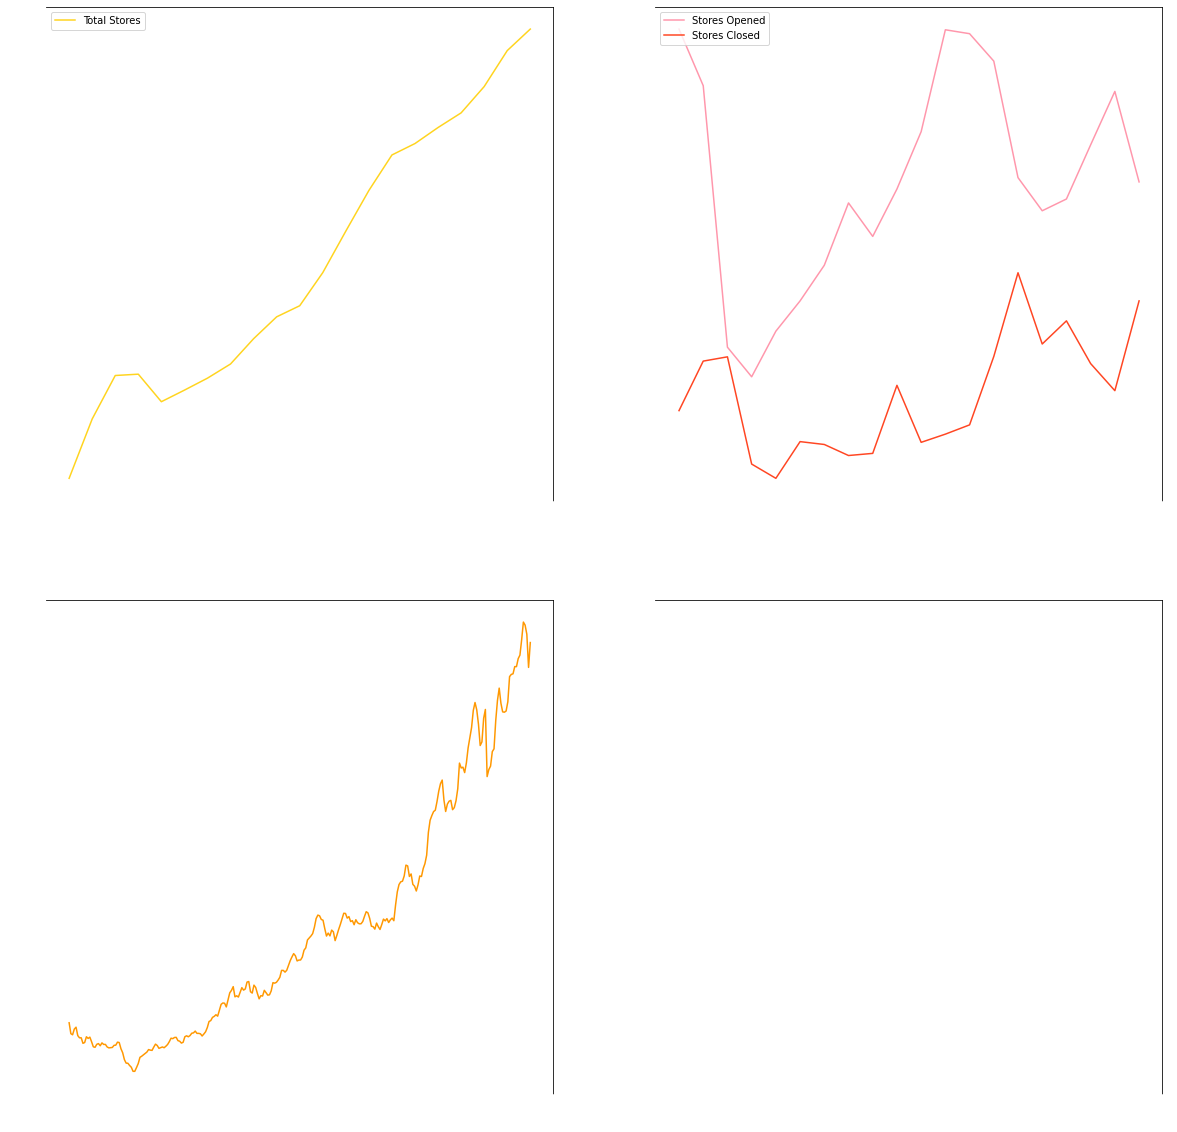

In [56]:
figure, ax = plt.subplots(2, 2)

figure.set_size_inches(20, 20)

ax[0][0].plot(store_num_data['Year'], store_num_data['Total Stores'], '#ffd41f', label='Total Stores')
ax[0][0].legend(loc="upper left")

ax[0][0].set_xticks(list(store_num_data['Year'])[::-2])

ax[0][1].plot(store_num_data['Year'], store_num_data['Stores Opened'], '#ff97ac', label='Stores Opened')
ax[0][1].plot(store_num_data['Year'], store_num_data['Stores Closed'], '#ff4623', label='Stores Closed')
ax[0][1].legend(loc="upper left")

ax[0][1].set_xticks(list(store_num_data['Year'])[::-2])

ax[1][0].plot(month_avg_stocks['Month'], month_avg_stocks['High'], '#ff9801')
ax[1][0].set_xticks(list(month_avg_stocks['Month'])[::36])
ax[1][0].set_xlabel('Stock Avg Each Month')#, color='white')

# Make axis/labels white
for row in range(0,2):
    for column in range(0,2):
        ax[row][column].spines['bottom'].set_color('white')
        ax[row][column].xaxis.label.set_color('white')
        ax[row][column].tick_params(axis='x', colors='white')
        ax[row][column].spines['left'].set_color('white')
        ax[row][column].yaxis.label.set_color('white')
        ax[row][column].tick_params(axis='y', colors='white')